# Семинар 4
## Дерево решений, композиции алгоритмов



## Дерево решений

### Классификация

Чтобы понять деревья принятия решений, давайте просто построим одно такое дерево и посмотрим, как оно вырабатывает прогнозы. 

Следующий код обучает классификатор `DecisionTreeClassifier` на наборе данных `iris`

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
iris = load_iris()
X = iris.data[:, 2:] #длина и ширина лепестка 
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

Вы можете визуализировать обученное дерево принятия решений

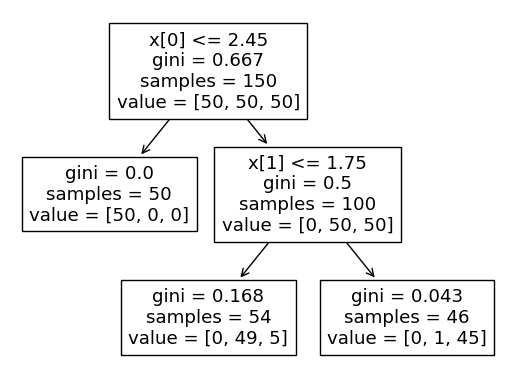

In [5]:
plot_tree(tree_clf);

Атрибут `samples` узла подсчитывает, к скольким обучающим образцам он применяется. Например, `100` обучающих образцов имеют длину лепестка больше 2.45 см (глубина 1, справа), среди которых `54` образца имеют ширину лепестка меньше 1.75 см (глубина 2, слева). 

Атрибут `value` узла сообщает, к скольким обучающим образцам каждого класса применяется этот узел: например, правый нижний узел применяется к `О` образцов ириса щетинистого, `1` образцу ириса разноцветного и `45` образцам ириса виргинского. 

Атрибут `gini` (`показатель Джини (Gini)`) узла измеряет его загрязненность (`inpurity`): узел "чист" (`gini=O`), если все обучающие образцы, к которым он применяется, принадлежат одному и тому же классу. Скажем, поскольку узел на глубине 1 слева применяется только к обучающим образцам ириса щетинистого, он чистый и его показатель Джини равен `О`.

*Одним из многих качеств деревьев принятия решений является то, что они требуют совсем небольшой подготовки данных. В частности, для них вообще не нужно масштабирование признаков.*

Дерево принятия решений также в состоянии оценивать вероятность принадлежности образца определенному классу `k`: сначала происходит обход дерева, чтобы найти листовой узел для данного образца, и затем возвращается пропорция обучающих образцов класса `k` в найденном узле.

In [6]:
tree_clf.predict_proba([X[132]])

array([[0.        , 0.02173913, 0.97826087]])

In [7]:
tree_clf.predict([X[132]])

array([2])

### Гиперпараметры реrуляризации

Деревья принятия решений выдвигают очень мало предположений об обучающих данных (в противоположность линейным моделям, которые очевидным образом предполагают, что данные линейны, к примеру).

Так как нет никакх ограничений, дерево будет адаптировать себя к обучающим данным, очень близко подгоняясь к ним и, скорее всего, допуская переобучение.

Во избежание переобучения обучающими данными вы должны ограничивать свободу дерева принятия решений во время обучения. Такой прием называется регуляризацией

Гиперпараметры регуляризации зависят от используемого алгоритма, но обычно вы можете, по крайней мере, ограничить максимальную глубину дерева принятия решений. В `Scikit-Learn` максимальная глубина управляется гиперпараметром `max_depth`

Класс `DecisionTreeClassifier` имеет несколько других параметров, которые похожим образом ограничивают форму дерева принятия решений: 
- `min_samplеs_sрlit` (минимальное число образцов, которые должны присутствовать в узле, прежде чем его можно будет расщепить).
- `min_samples_leaf` (минимальное количество образцов, которое должен иметь листовой узел).
- `min_weight_fraction_leaf` (то же, что и `min_samplеs_lеаf`, но выраженное в виде доли от общего числа взвешенных образцов).
- `max_leaf_nodes` (максимальное количество листовых узлов).
- и `max_features` (максимальное число признаков, которые оцениваются при расщеплении каждого узла). 

Увеличение гиперпараметров `min_*` или уменьшение гиперпараметров `max_*` будет регуляризировать модель.

In [8]:
iris = load_iris()
X = iris.data[:, 2:] #длина и ширина лепестка 
y = iris.target
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X, y)

DecisionTreeClassifier()

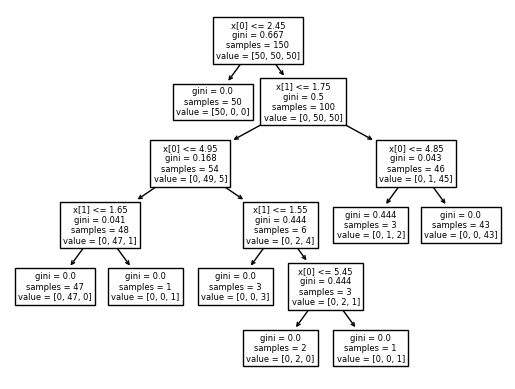

In [9]:
plot_tree(tree_clf);

In [10]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

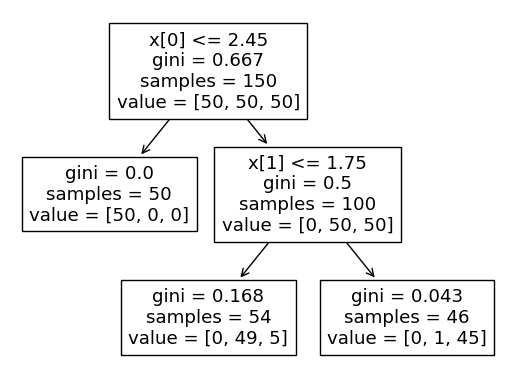

In [11]:
plot_tree(tree_clf);

### Регрессия

Деревья принятия решений также способны иметь дело с задачами регрессии. Давайте построим дерево регрессии с применением класса `DecisionTreeRegressor` из `Scikit-Learn`, обучив его на зашумленномнаборе данных с `max_depth=2`:

In [12]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=150, n_features=2, noise=10)

tree_reg = DecisionTreeRegressor(max_depth=2 )
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

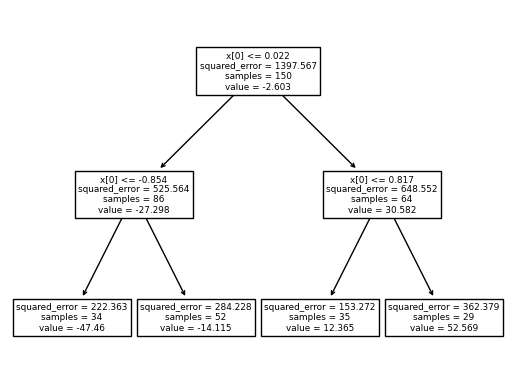

In [13]:
plot_tree(tree_reg);

Это дерево выглядит очень похожим на дерево классификации, которое мы строили ранее.
Главное отличие в том, что вместо прогнозирования класса в каждом узле оно прогнозирует значение.

Обратите внимание, что спрогнозированное значение для каждой области всегда будет средним целевым значением образцов в этой области. Алгоритм расщепляет каждую область так, чтобы расположить большинство обучающих образцов как можно ближе к спрогнозированному значению.

In [14]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=150, n_features=1, noise=10)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


12.938154389121735


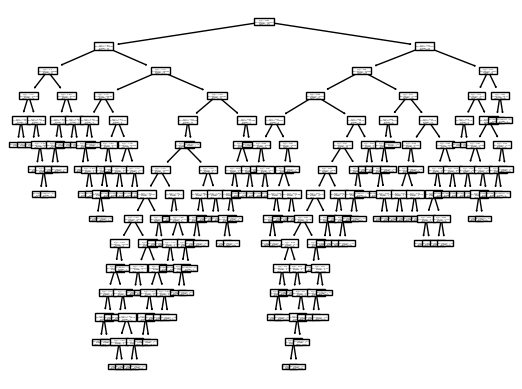

In [15]:
plot_tree(tree_reg);

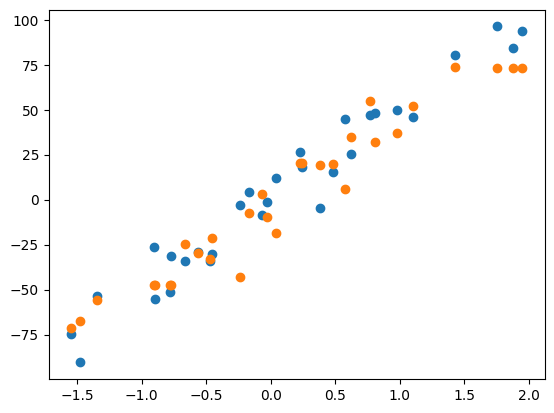

In [16]:
import matplotlib.pyplot as plt

plt.scatter(X_test.ravel(), y_test)
plt.scatter(X_test.ravel(), y_pred)

### Композиции алгоритмов

Предположим, вы задаете сложный вопрос тысячам случайных людей и затем агрегируете их ответы. Во многих случаях вы обнаружите, что такой агрегированный ответ оказывается лучше, чем ответ эксперта. Это называется `коллективным разумом`.

Аналогично если вы агрегируете прогнозы группы прогнозаторов (таких как классификаторы или регрессоры), то часто будете получать лучшие прогнозы, чем прогноз от наилучшего индивидуального прогнозатора. Группа прогнозаторов называется `ансамблем`. 

Cоответственно, прием носит название `ансамблевое обучение`, а алгоритм ансамблевого обучения именуется `ансамблевым методом`.

Например, вы можете обучать группу классификаторов на основе деревьев принятия решений, задействовав для каждого отличающийся случайный поднабор обучающего набора. Для вырабатывания прогнозов вы лишь получаете прогнозы всех индивидуальных деревьев и прогнозируете класс, который стал обладателем большинства голосов. 


#### Bootstrap

Можно представить себе мешок, из которого достают шарики: выбранный на каком-то шаге шарик возвращается обратно в мешок, и следующий выбор опять делается равновероятно из того же числа шариков. Отметим, что из-за возвращения среди них окажутся повторы.

![](./imgs/sem4/bootstrap.jpg)

#### Bagging (от Bootstrap aggregation)

Bagging - это обучение каждого алгоритма МО на одной из выборок (у каждого алгоритма своя выборка), полученной методом bootstrap, с последующим усреднением ответа от каждого предиктора - в случае регрессии, в случае классификации - ответ выбирается посредством голосования (какой класс предсказался больше всего раз, тот и выберем).

![](./imgs/sem4/bagging.png)


Эффективность бэггинга достигается благодаря тому, что базовые алгоритмы, обученные по различным подвыборкам, получаются достаточно различными, и их ошибки взаимно компенсируются при голосовании, а также за счёт того, что объекты-выбросы могут не попадать в некоторые обучающие подвыборки.

В библиотеке `scikit-learn` есть реализации `BaggingRegressor` и `BaggingClassifier`, которые позволяют использовать большинство других алгоритмов "внутри".

Показанный ниже код обучает ансамбль из `500` классификаторов на основе деревьев принятия решений, каждый из которых обучается на `100` обучающих экземплярах, случайно выбранных из обучающего набора. 
Параметр `n_jobs` сообщает `ScikitLearn` количество процессорных ядер для использования при обучении и прогнозировании (`-1`указывает на необходимость участия всех доступных ядер):

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

iris = load_digits()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=100,
    bootstrap=True,
    n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

#### Случайный лес

Такой ансамбль деревьев принятия решений называется `случайным лесом (random forest)` и, несмотря на свою простоту, является довольно мощным алгоритмов.

Что случайного в случайном лесе:

    1. Обучающие выборки, сформированные методом бутстрап
    2. Признаки для условий в каждом узле дерева (вместо поиска лучшего из лучших признаков при расщеплении узла он ищет наилучший признак в случайном поднаборе признаков)

Вместо построения экземпляра `BaggingClassifier` и его передачи экземпляру `DecisionTreeClassifier` вы можете применить класс `RandomForestClassifier`, который является более удобным и оптимизированным для деревьев принятия решений (аналогичным образом имеется класс `RandomForestRegressor` для задач регрессии). 

Показанный ниже код обучает классификатор на основе случайного леса с `500` деревьями (каждое ограничено максимум `16` узлами), используя все доступные процессорные ядра:

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


iris = load_digits()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

rnd_clf = RandomForestClassifier(n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

accuracy_score(y_test, y_pred_rf)

0.975

#### Градиентный бустинг

**Бустинг** — это техника построения ансамблей, в которой модели построены не независимо, а последовательно.

**Градиентный бустинг** — это техника машинного обучения для задач классификации и регрессии, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно деревьев решений.

In [25]:
from sklearn.datasets import make_regression
import pandas as pd

In [26]:
X, y = make_regression(
    n_samples=100,
    n_features=3,
    n_informative=2,
    noise=10
)

In [27]:
df = pd.DataFrame(X)
df['y_true'] = y

In [28]:
df

,0,1,2,y_true
0,-0.135456,-1.013084,-1.430305,-37.673161
1,1.883766,0.568611,0.391718,184.487726
2,0.428091,0.781200,-0.438449,40.129650
3,1.613016,-0.746272,1.112609,178.316824
4,-0.285830,0.899955,0.390032,-18.258000
...,...,...,...,...
95,-1.184045,0.025689,-0.321175,-118.370507
96,-0.515505,0.315502,-1.474370,-64.266387
97,-0.382320,-1.635677,0.070134,-32.789144
98,0.891264,-0.674273,-1.349810,70.299484


Смысл бустинга заключается в том, что мы будем бустить какое-то константное предсказание.

Добавим его в наш датасет:

In [29]:
df['y_pred_0'] = df['y_true'].mean()
df

,0,1,2,y_true,y_pred_0
0,-0.135456,-1.013084,-1.430305,-37.673161,31.267689
1,1.883766,0.568611,0.391718,184.487726,31.267689
2,0.428091,0.781200,-0.438449,40.129650,31.267689
3,1.613016,-0.746272,1.112609,178.316824,31.267689
4,-0.285830,0.899955,0.390032,-18.258000,31.267689
...,...,...,...,...,...
95,-1.184045,0.025689,-0.321175,-118.370507,31.267689
96,-0.515505,0.315502,-1.474370,-64.266387,31.267689
97,-0.382320,-1.635677,0.070134,-32.789144,31.267689
98,0.891264,-0.674273,-1.349810,70.299484,31.267689


In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(df['y_true'], df['y_pred_0'])

83.64294087330029

Чтобы начать градиентный бустинг, нам нужно посчитать разницу, чтобы наш алгоритм обучался на ошибках предыдущего.

In [32]:
df['residual_0'] = df['y_true'] - df['y_pred_0']

In [33]:
df

,0,1,2,y_true,y_pred_0,residual_0
0,-0.135456,-1.013084,-1.430305,-37.673161,31.267689,-68.940850
1,1.883766,0.568611,0.391718,184.487726,31.267689,153.220037
2,0.428091,0.781200,-0.438449,40.129650,31.267689,8.861961
3,1.613016,-0.746272,1.112609,178.316824,31.267689,147.049135
4,-0.285830,0.899955,0.390032,-18.258000,31.267689,-49.525689
...,...,...,...,...,...,...
95,-1.184045,0.025689,-0.321175,-118.370507,31.267689,-149.638196
96,-0.515505,0.315502,-1.474370,-64.266387,31.267689,-95.534076
97,-0.382320,-1.635677,0.070134,-32.789144,31.267689,-64.056833
98,0.891264,-0.674273,-1.349810,70.299484,31.267689,39.031795


Обучим дерево решений на этой ошибке:

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth=1)
tree_1.fit(df[[0,1,2]], df[['residual_0']])

DecisionTreeRegressor(max_depth=1)

In [36]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [37]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-0.135456,-1.013084,-1.430305,-37.673161,31.267689,-68.940850,-84.433122
1,1.883766,0.568611,0.391718,184.487726,31.267689,153.220037,81.122019
2,0.428091,0.781200,-0.438449,40.129650,31.267689,8.861961,81.122019
3,1.613016,-0.746272,1.112609,178.316824,31.267689,147.049135,81.122019
4,-0.285830,0.899955,0.390032,-18.258000,31.267689,-49.525689,-84.433122
...,...,...,...,...,...,...,...
95,-1.184045,0.025689,-0.321175,-118.370507,31.267689,-149.638196,-84.433122
96,-0.515505,0.315502,-1.474370,-64.266387,31.267689,-95.534076,-84.433122
97,-0.382320,-1.635677,0.070134,-32.789144,31.267689,-64.056833,-84.433122
98,0.891264,-0.674273,-1.349810,70.299484,31.267689,39.031795,81.122019


Теперь забустим наше первоначальное предсказание. Для этого полученные предсказания первого дерева нужно умножить на learning rate и прибавить к константному предсказанию. Таким образом мы приблизимся на шаг и истинным значениям.

In [38]:
lr = 0.1
df['y_pred_1'] = df['y_pred_0'] + lr * df['tree_pred_1']

In [39]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-0.135456,-1.013084,-1.430305,-37.673161,31.267689,-68.940850,-84.433122,22.824377
1,1.883766,0.568611,0.391718,184.487726,31.267689,153.220037,81.122019,39.379891
2,0.428091,0.781200,-0.438449,40.129650,31.267689,8.861961,81.122019,39.379891
3,1.613016,-0.746272,1.112609,178.316824,31.267689,147.049135,81.122019,39.379891
4,-0.285830,0.899955,0.390032,-18.258000,31.267689,-49.525689,-84.433122,22.824377
...,...,...,...,...,...,...,...,...
95,-1.184045,0.025689,-0.321175,-118.370507,31.267689,-149.638196,-84.433122,22.824377
96,-0.515505,0.315502,-1.474370,-64.266387,31.267689,-95.534076,-84.433122,22.824377
97,-0.382320,-1.635677,0.070134,-32.789144,31.267689,-64.056833,-84.433122,22.824377
98,0.891264,-0.674273,-1.349810,70.299484,31.267689,39.031795,81.122019,39.379891


Посчитаем ошибку и убедимся что она уменьшилась:

In [40]:
print(f"Было: {mean_absolute_error(df['y_true'], df['y_pred_0'])}")
print(f"Стало: {mean_absolute_error(df['y_true'], df['y_pred_1'])}")

Было: 83.64294087330029
Стало: 76.18633734863174


Таким образом, мы забустили константное предсказание.

Далее алгоритм для следующего дерева такой же:
- Посчитать разницу между последним предсказанием и истинным значением
- Обучить новое дерево на этой разнице
- Предсказываем значения на новом дереве
- Делаем шаг от прошлого предсказания в сторону истинных значений
    
Обернем все в цикл:

In [46]:
train = df[[0,1,2,'y_true']].copy()
train['y_pred'] = train['y_true'].mean()
train

,0,1,2,y_true,y_pred
0,-0.135456,-1.013084,-1.430305,-37.673161,31.267689
1,1.883766,0.568611,0.391718,184.487726,31.267689
2,0.428091,0.781200,-0.438449,40.129650,31.267689
3,1.613016,-0.746272,1.112609,178.316824,31.267689
4,-0.285830,0.899955,0.390032,-18.258000,31.267689
...,...,...,...,...,...
95,-1.184045,0.025689,-0.321175,-118.370507,31.267689
96,-0.515505,0.315502,-1.474370,-64.266387,31.267689
97,-0.382320,-1.635677,0.070134,-32.789144,31.267689
98,0.891264,-0.674273,-1.349810,70.299484,31.267689


In [47]:
n_trees = 10
lr = 0.1

trees = []
for i in range(n_trees):
    train['residual'] = train['y_true'] - train['y_pred']
    tree = DecisionTreeRegressor(max_depth=1)
    tree.fit(train[[0,1,2]], train[['residual']])
    trees.append(tree)
    train['y_pred'] += lr *  tree.predict(train[[0,1,2]])
    print(f"Дерево {i + 1}: MAE={mean_absolute_error(train['y_true'], train['y_pred'])}")
    
    

Дерево 1: MAE=76.18633734863174
Дерево 2: MAE=69.78839469511819
Дерево 3: MAE=65.23121406231614
Дерево 4: MAE=59.80214563570313
Дерево 5: MAE=55.92610812568657
Дерево 6: MAE=52.97726287762965
Дерево 7: MAE=49.89017878618041
Дерево 8: MAE=47.449637517710016
Дерево 9: MAE=44.10842265940846
Дерево 10: MAE=41.8402034112005


Таким образом мы обучили наши деревья, давайте напишем инференс(сделаем предсказание) по ним.

Чтобы сделать предсказание, нужно так же сначала сделать констатное предсказание.

In [48]:
test = df[[0,1,2,'y_true']].copy()
test['y_pred'] = test['y_true'].mean()

for tree in trees:
    test['y_pred'] += lr * tree.predict(df[[0,1,2]])
    
print(f"MAE: {mean_absolute_error(test['y_true'], test['y_pred'])}")

MAE: 41.8402034112005


#### Популярные библиотеки для градиентного бустинга



- [CatBoost](https://catboost.ai/en/docs/)
- [LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/#)
- [XGBoost](https://xgboost.readthedocs.io/en/stable/#)

CatBoost, LightGBM и XGBoost - это три популярные библиотеки градиентного бустинга, которые широко используются для решения задач машинного обучения. Вот несколько основных различий между ними:

1. Обработка категориальных признаков: CatBoost и LightGBM предоставляют встроенные механизмы для автоматической обработки категориальных признаков, в то время как в XGBoost необходимо предварительно выполнять преобразования для кодирования категориальных признаков в числовые значения.

2. Оптимизация памяти и скорость обучения: LightGBM и CatBoost изначально были разработаны с акцентом на оптимизацию памяти и производительность. Они используют различные алгоритмы для сжатия данных и оптимизации работы с памятью, что делает их более эффективными на больших наборах данных и быстрее в обучении моделей, по сравнению с XGBoost.

3. Поддержка работы с категориальными признаками не только в деревьях, но и в линейных моделях: CatBoost позволяет использовать категориальные признаки не только в деревьях, но и в линейных моделях, что может быть полезно в некоторых задачах. LightGBM также поддерживает использование категориальных признаков в линейных моделях, но XGBoost поддерживает только использование категориальных признаков в деревьях.

4. Автоматическая обработка пропущенных значений: CatBoost автоматически обрабатывает пропущенные значения в данных без необходимости предварительной обработки, в то время как LightGBM и XGBoost требуют явного заполнения пропущенных значений перед обучением моделей.

5. Работа с несбалансированными данными: CatBoost и XGBoost предлагают встроенные механизмы для работы с несбалансированными данными, такими как автоматическое балансирование классов, в то время как LightGBM требует явного указания параметров модели для работы с несбалансированными данными.

### CatBoost

Библиотека CatBoost – это градиентный бустинговый фреймворк с открытым исходным кодом, разработанный компанией Yandex.

In [ ]:
# !pip install catboost

В этом примере мы использовали функцию `make_regression` из библиотеки `scikit-learn` для генерации синтетических данных для задачи регрессии. Затем мы создали и обучили модель `CatBoostRegressor`, указав индексы категориальных признаков в параметре `cat_features`. Наконец, мы оценили качество модели на тестовом наборе данных с помощью среднеквадратичной ошибки (`MSE`).

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor

# Генерация синтетических данных
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, random_state=42)
X = np.round(X)  # Округление признаков до целых чисел
X = X.astype(int)  # Преобразование признаков в целочисленный тип данных
cat_features = [0, 2, 4]  # Индексы категориальных признаков

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели CatBoostRegressor
model = CatBoostRegressor(iterations=1000,  # Количество итераций
                          learning_rate=0.1,  # Скорость обучения
                          depth=6,  # Глубина дерева
                          cat_features=cat_features,  # Индексы категориальных признаков
                          random_state=42)  # Задаем случайное начальное состояние для воспроизводимости

model.fit(X_train, y_train, verbose=100)  # Обучение модели с выводом прогресса на каждой 100-й итерации

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = np.mean((y_test - y_pred) ** 2)  # Среднеквадратичная ошибка
print(f"Mean Squared Error: {mse:.4f}")



#### LightGBM

LightGBM - это эффективная библиотека градиентного бустинга, разработанная Microsoft, которая обладает высокой производительностью благодаря оптимизации памяти и быстрым алгоритмам обучения.

In [ ]:
# !pip install lightgbm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Генерация синтетических данных
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, random_state=42)
X = np.round(X)  # Округление признаков до целых чисел

# Создание DataFrame из массивов NumPy
df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(X.shape[1])])
df["cat_feature"] = np.random.choice(["A", "B", "C"], size=X.shape[0])  # Добавление категориального признака
df['cat_feature'] = df['cat_feature'].astype('category')
cat_features = ["cat_feature"]  # Список категориальных признаков

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

# Создание и обучение модели LGBMRegressor
model = lgb.LGBMRegressor(num_leaves=31,  # Количество листьев в дереве
                          learning_rate=0.1,  # Скорость обучения
                          n_estimators=100,  # Количество деревьев
                          categorical_feature=cat_features,  # Список категориальных признаков
                          random_state=42)  # Задаем случайное начальное состояние для воспроизводимости
model.fit(X_train, y_train, verbose=10)  # Обучение модели с выводом прогресса на каждой 10-й итерации

# Прогнозирование на тестовом наборе данных
y_pred = model.predict(X_test)

# Оценка качества модели
mse = np.mean((y_test - y_pred) ** 2)  # Среднеквадратичная ошибка
print(f"Mean Squared Error: {mse:.4f}")


В этом примере мы использовали функцию `make_regression` из библиотеки `scikit-learn` для генерации синтетических данных для задачи регрессии. Затем мы создали `DataFrame` из массивов `NumPy`, добавили категориальный признак в `DataFrame` с помощью библиотеки `pandas`, и указали его в параметре `categorical_feature` при создании и обучении модели `LGBMRegressor`. Наконец, мы оценили качество модели на тестовом наборе данных с помощью среднеквадратичной ошибки (`MSE`).

#### XGBoost

Библиотека XGBoost была разработана и представлена в 2014 году Даниэлем Ченом (Daniel Chen) - исследователем в области машинного обучения и анализа данных. Он разработал XGBoost в рамках своей докторской диссертации на университете Вашингтона (University of Washington), и с тех пор библиотека стала одним из наиболее популярных инструментов машинного обучения, широко применяемых в индустрии и академическом сообществе. В настоящее время XGBoost поддерживается и развивается открытым сообществом разработчиков.

In [ ]:
# !pip install xgboost

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Создание синтетических данных с категориальными признаками
X, y = make_regression(n_samples=1000, n_features=5, n_informative=3, random_state=42)
X = np.round(X)  # Округление признаков до целых чисел
X = X.astype(int)  # Приведение типа данных к целочисленному

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта DMatrix для обучающей и тестовой выборок
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Определение параметров модели
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 3,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'alpha': 0.1,
    'lambda': 0.1,
    'min_child_weight': 1,
    'seed': 42
}

# Обучение модели XGBoost
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Прогнозирование на тестовой выборке
y_pred = model.predict(dtest)

# Оценка качества модели
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print(f'RMSE на тестовой выборке: {rmse:.4f}')


В данном примере мы создаем синтетические данные с категориальными признаками, разделяем их на обучающую и тестовую выборки, создаем объекты DMatrix для этих выборок, определяем параметры модели XGBoost, обучаем модель и оцениваем ее качество на тестовой выборке с помощью метрики RMSE (корень из среднеквадратической ошибки).

### Как подобрать наилучшие гиперпараметры для модели

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostRegressor

# Генерация данных
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели CatBoostRegressor
model = CatBoostRegressor()

# Определение гиперпараметров и их значений для подбора
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'iterations': [100, 200, 300]
}

# Подбор гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Вывод наилучших параметров и значения метрик
print("Наилучшие параметры: ", grid_search.best_params_)
print("Наилучшее значение RMSE на тестовом наборе: ", np.sqrt(-grid_search.score(X_test, y_test)))


## Лаб 4

Узнать какой бустинг и с какими гиперпараметрами лучше работает на вашем наборе данных.

Обучить простую модель и бустинг, сравнить модели по какой-нибудь метрике.